[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


NameError: name 'cv2' is not defined

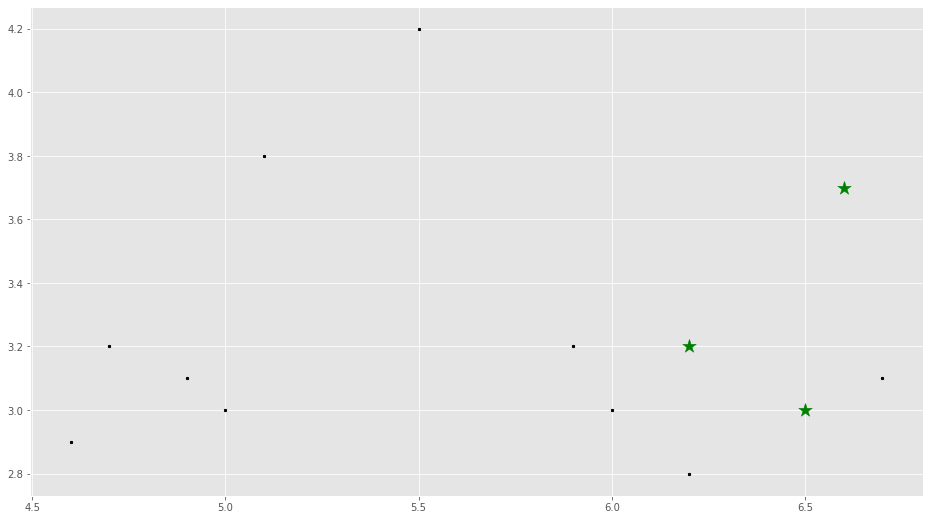

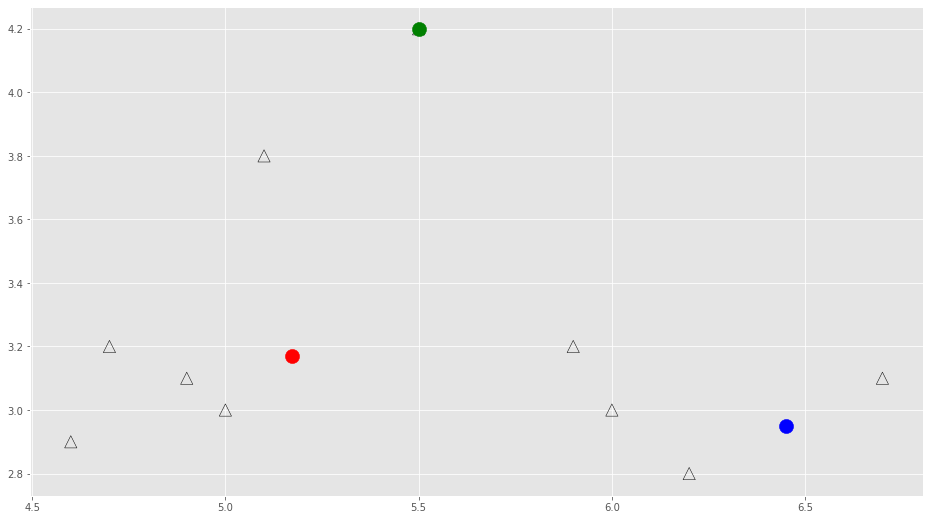

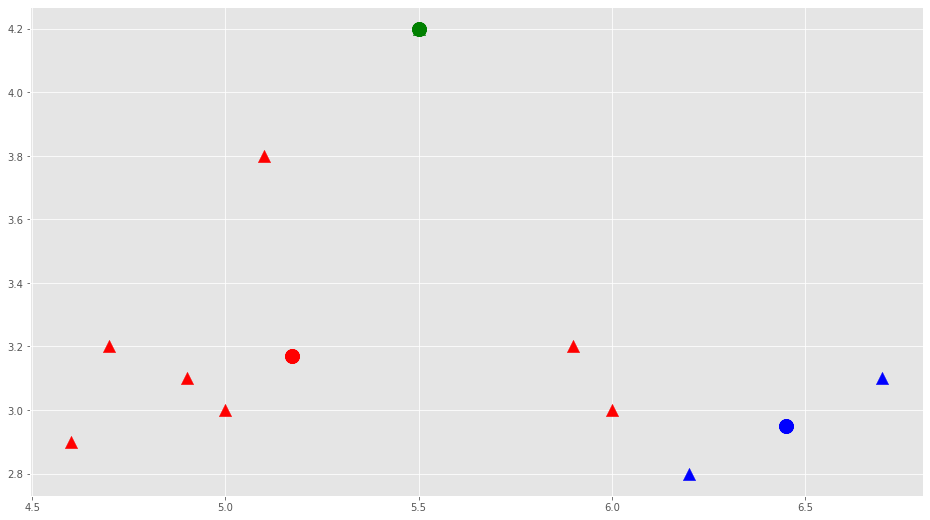

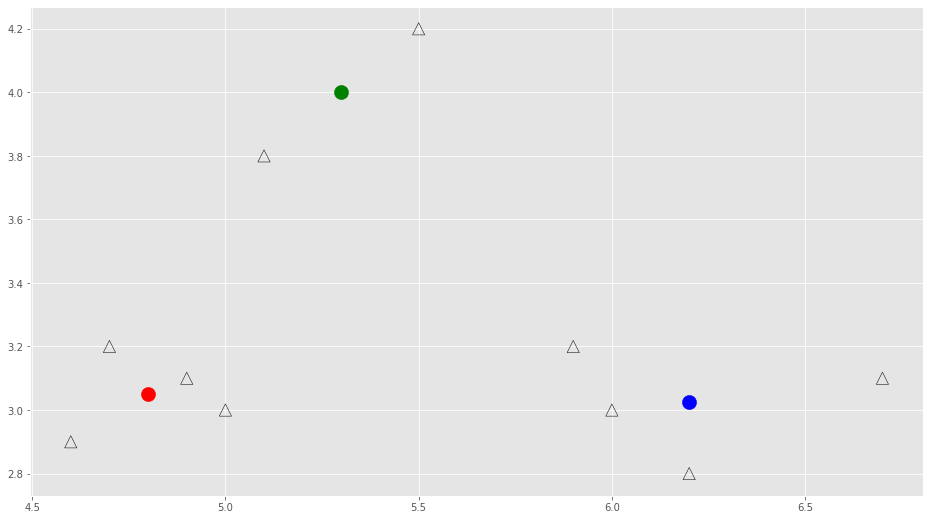

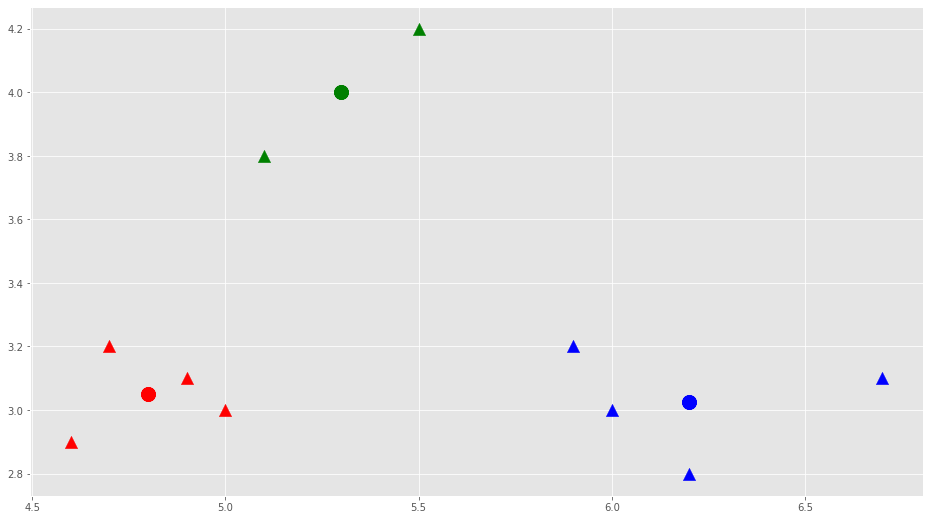

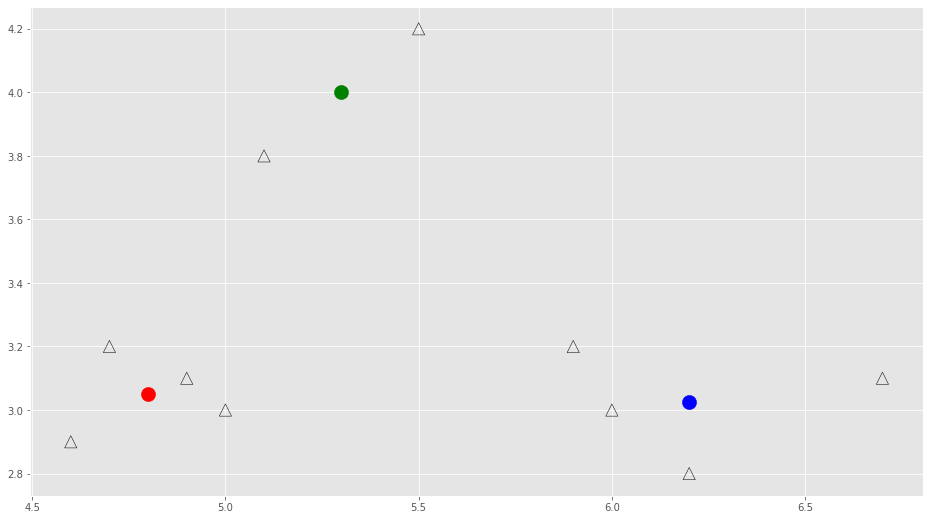

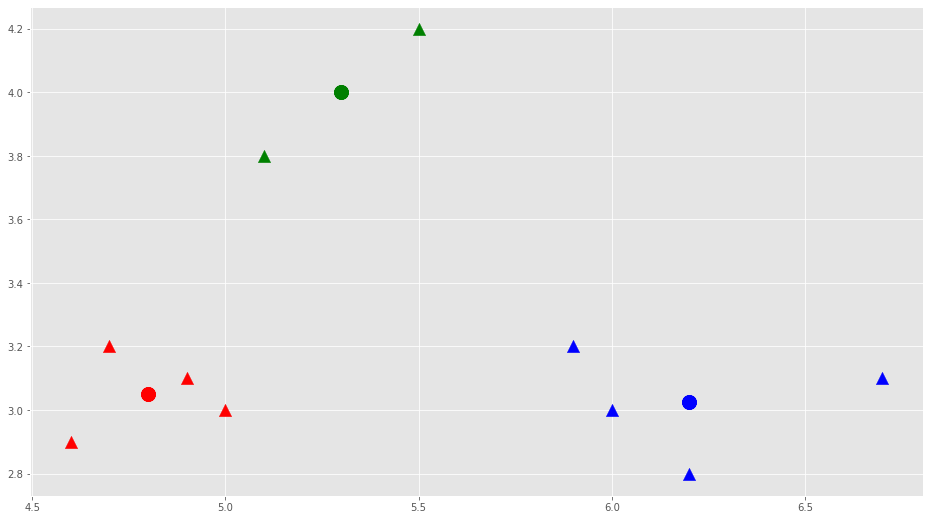

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

f1 = [5.9, 4.6, 6.2, 4.7, 5.5, 5.0, 4.9, 6.7, 5.1, 6.0]
f2 = [3.2, 2.9, 2.8, 3.2, 4.2, 3.0, 3.1, 3.1, 3.8, 3.0]
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

def Euclidean_dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k = 3

C_x = [6.2, 6.6, 6.5]

C_y = [3.2, 3.7, 3.0]
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = Euclidean_dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']

count=0
while error != 0:
    count=count+1
    for i in range(len(X)):
        distances = Euclidean_dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = np.copy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    for i in range(3):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        print(C)
    fig, axx = plt.subplots()
    axx.scatter(f1, f2, marker='^', s=150, edgecolor='black', facecolor='none')
    axx.scatter(C[0, 0], C[0, 1], marker='o', s=200, c=colors[0])
    axx.scatter(C[1, 0], C[1, 1], marker='o', s=200, c=colors[1])
    axx.scatter(C[2, 0], C[2, 1], marker='o', s=200, c=colors[2])
    plt.savefig('task3_iter{}_b.jpg'.format(count))
    error = Euclidean_dist(C, C_old, None)
    fig, ax = plt.subplots()
    for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], marker='^', s=150, c=colors[i])
        ax.scatter(C[0, 0], C[0, 1], marker='o', s=200, c=colors[0])
        ax.scatter(C[1, 0], C[1, 1], marker='o', s=200, c=colors[1])
        ax.scatter(C[2, 0], C[2, 1], marker='o', s=200, c=colors[2])
        print(C)
    plt.savefig("task3_iter{}_a.jpg".format(count))

class KMeans():
    def __init__(self, num_clusters, tolerance=0.0001, epochs=30, centroids={}):
        self.num_clusters = num_clusters
        self.tolerance = tolerance
        self.epochs = epochs
        self.centroids = centroids
    
    def generate(self, data):
        classification = list()
        for point in data:
            distances = [np.linalg.norm(point - self.centroids[centroid]) for centroid in self.centroids]
            classification.append(distances.index(min(distances)))
        return np.array(classification)
    
    
    def model(self, data):
        if self.centroids == {}:
            for i in range(self.num_clusters):
                self.centroids[i] = data[i]
        
        for i in range(self.epochs):
            self.classifications = {}
            for cluster in range(self.num_clusters):
                self.classifications[cluster] = []
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(features)
            prev_centroid = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            optimized = True
            for cent in self.centroids:
                original_centroid = prev_centroid[cent]
                current_centroid = self.centroids.get(cent)
                if np.sum(((original_centroid - current_centroid) * 100) * original_centroid) > self.tolerance:
                    optimized = False
            if optimized:
                break





def Img_Quant(num_colors):
    original_img = cv2.imread('baboon.jpg')
    image_matrix = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    print(image_matrix[511][2][1])
    image = np.array(image_matrix, dtype=np.float64) / 255
    print(type(image))
    print(image[511][2][1])
    w, h, d = tuple(image.shape)
    image_array = np.reshape(image, (w * h, d))
    print(image_array.shape)
    image_quantization = KMeans(num_clusters=num_colors, epochs=30)
    image_quantization.model(image_array)
    labels = image_quantization.generate(image_array)
    print(image_quantization.centroids)
    new_img = np.zeros((w, h, 3))
    new_img = np.array(image, dtype=np.float64)
    label_index = 0
    for i in range(w):
        for j in range(h):
            new_img[i][j] = image_quantization.centroids[labels[label_index]]
            label_index += 1
    matplotlib.image.imsave('task3_baboon_{}.png'.format(num_colors), new_img)

Img_Quant(10)

